In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def plot_grid(imgs, titles, rows, cols, figsize):
    fig, axs = plt.subplots(rows, cols, figsize=figsize) # Cria um grid para as imgs
    for a, i, t in zip(axs.flatten(), imgs, titles):
        # Adiciona uma imagem (i) na posição correta (a):
        a.imshow(i, cmap='gray', aspect='equal', interpolation=None, vmin=0, vmax=255)
        a.set_title(t)
    # Desativa o eixo das imagens (separado pois o número de imgs pode não preencher o grid):
    for a in axs.flatten(): a.set_axis_off()

    plt.tight_layout()
    plt.show()
    return fig, axs

In [3]:
baboon = cv2.imread('./baboon.pgm', cv2.IMREAD_GRAYSCALE)
fiducial = cv2.imread('./fiducial.pgm', cv2.IMREAD_GRAYSCALE)
monarch = cv2.imread('./monarch.pgm', cv2.IMREAD_GRAYSCALE)
peppers = cv2.imread('./peppers.pgm', cv2.IMREAD_GRAYSCALE)
retina = cv2.imread('./retina.pgm', cv2.IMREAD_GRAYSCALE)
sonnet = cv2.imread('./sonnet.pgm', cv2.IMREAD_GRAYSCALE)
wedge = cv2.imread('./wedge.pgm', cv2.IMREAD_GRAYSCALE)
imgs = [baboon, fiducial, monarch, peppers, retina, sonnet, wedge]

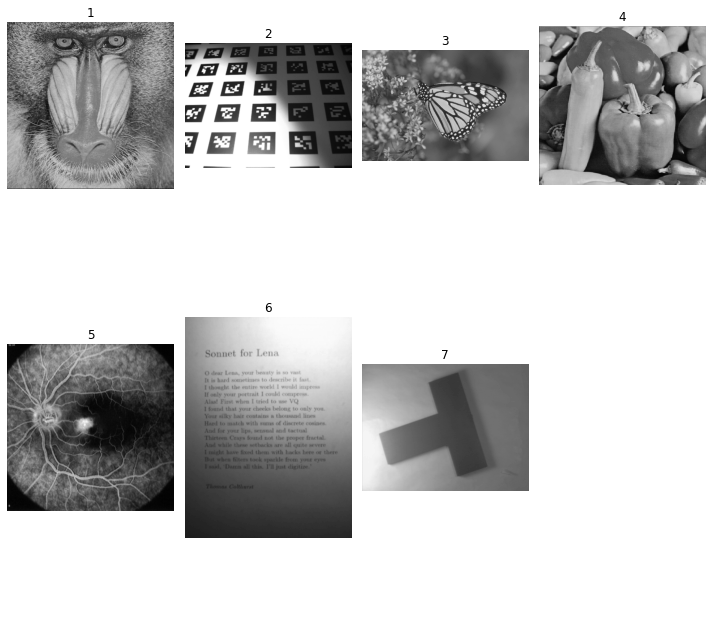

In [4]:
f1, axs1 = plot_grid(imgs, range(1, 8), 2, 4, (10, 10))

In [5]:
import scipy.ndimage as ndimage
μ = σ = imax = imin = med = None


def global_method(img, T=128):
    return img <= T


def bernsen(img):
    T = (imax + imin) / 2
    return img <= T


def niblack(img, k=-0.2):
    T = μ + k * σ
    return img <= T


def sauvola(img, k=0.5, R=128):
    T = μ * (1 + k * (σ / R - 1))
    return img <= T


def more(img, k=0.25, R=0.5, p=2, q=10):
    T = μ * (1 + p * np.exp((-q) * μ) + k * (σ / R - 1))
    return img <= T


def contrast(img):
    # Distance from local max and min:
    max_dist = imax - img
    min_dist = img - imin
    return max_dist <= min_dist  # if is closer to max (background)


def mean(img):
    return img <= μ


def median(img):
    return img <= med


meths = [global_method, bernsen, niblack, sauvola, more, contrast, mean, median]

15.25% of black and 84.75% of white
38.45% of black and 61.55% of white
53.83% of black and 46.17% of white
94.12% of black and 5.88% of white
0.51% of black and 99.49% of white
68.55% of black and 31.45% of white
42.99% of black and 57.01% of white
47.14% of black and 52.86% of white


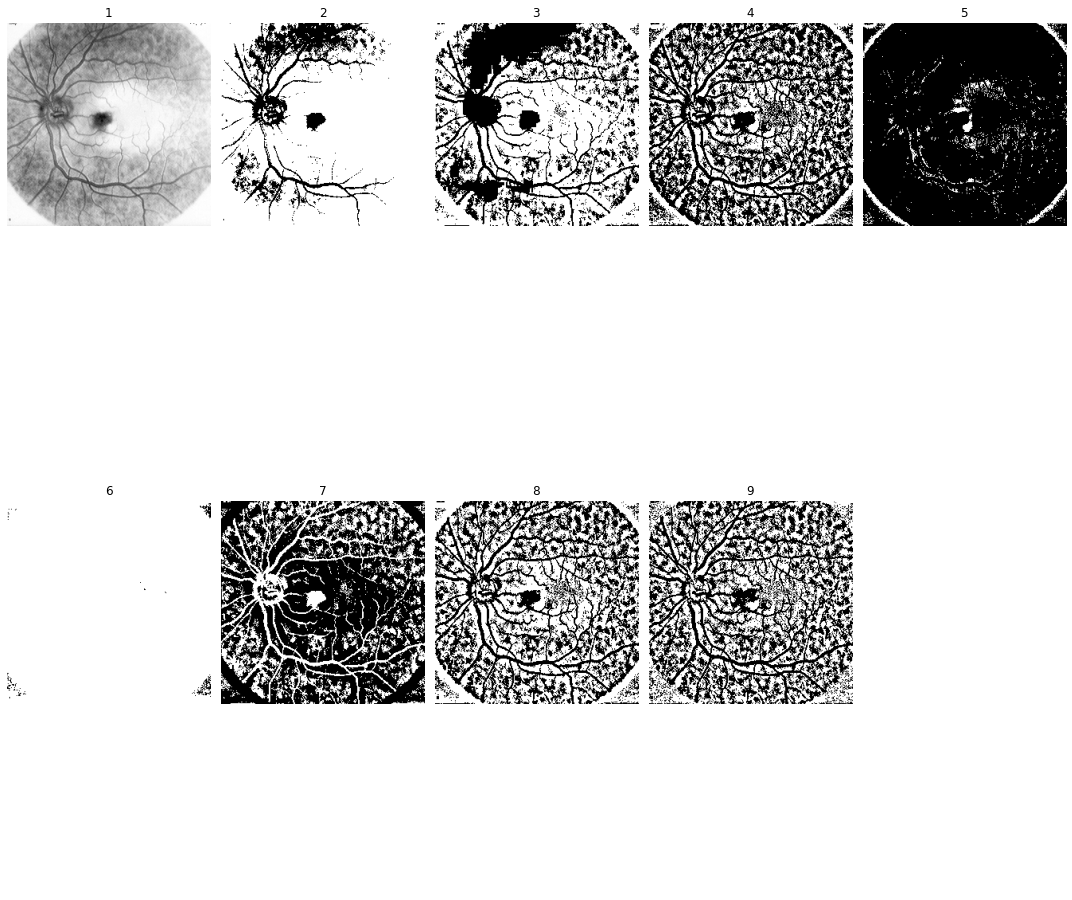

In [6]:
start = retina
n = 15
size = (n, n)
μ = ndimage.generic_filter(start, np.mean, size=size, mode='nearest')
σ = ndimage.generic_filter(start, np.std, size=size, mode='nearest')
imax = ndimage.generic_filter(start, np.max, size=size, mode='nearest')
imin = ndimage.generic_filter(start, np.min, size=size, mode='nearest')
med = ndimage.generic_filter(start, np.median, size=size, mode='nearest')

res = [start] + [f(start) for f in meths]
for r in res[1:]:
    x, y = r.shape
    perc = np.sum(r) / (x * y) * 100
    print('{:.2f}% of black and {:.2f}% of white'.format(100 - perc, perc))
res = [255 * r for r in res]

f, axs = plot_grid(res, range(1, 10), 2, 5, (15, 15))

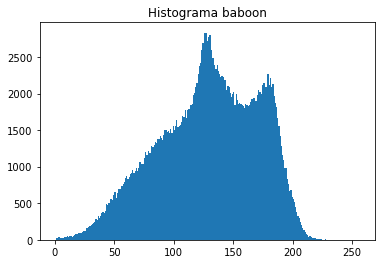

In [7]:
plt.hist(baboon.ravel(), 256, [0, 256])
plt.title('Histograma baboon')
plt.show()

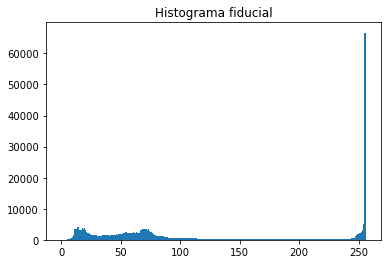

In [8]:
plt.hist(fiducial.ravel(), 256, [0, 256])
plt.title('Histograma fiducial')
plt.show()

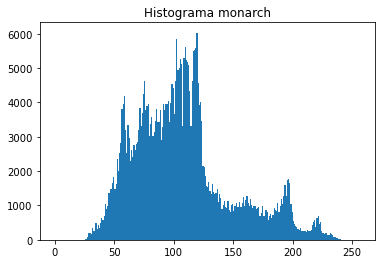

In [9]:
plt.hist(monarch.ravel(), 256, [0, 256])
plt.title('Histograma monarch')
plt.show()

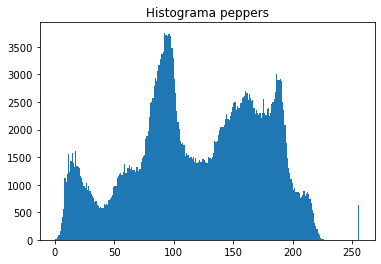

In [10]:
plt.hist(peppers.ravel(), 256, [0, 256])
plt.title('Histograma peppers')
plt.show()

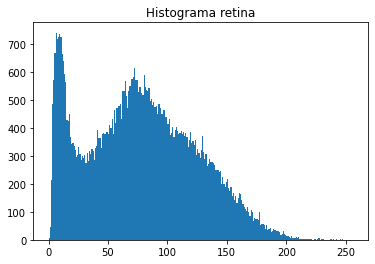

In [11]:
plt.hist(retina.ravel(), 256, [0, 256])
plt.title('Histograma retina')
plt.show()

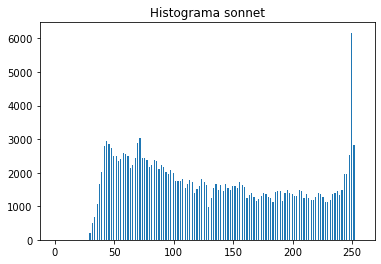

In [12]:
plt.hist(sonnet.ravel(), 256, [0, 256])
plt.title('Histograma sonnet')
plt.show()

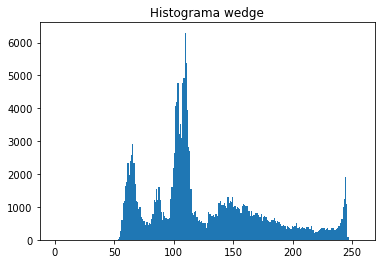

In [13]:
plt.hist(wedge.ravel(), 256, [0, 256])
plt.title('Histograma wedge')
plt.show()